In [1]:
#load packages
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings
import matplotlib.pyplot as plt
from scipy.stats import zscore
from scipy.stats.mstats import winsorize

warnings.filterwarnings('ignore')

In [2]:
#get data
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

education_df = pd.read_sql_query('select * from useducation',con=engine)

engine.dispose()

In [3]:
#replace missing values
fill = ['ENROLL', 'TOTAL_REVENUE', 'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE', 'TOTAL_EXPENDITURE', 
        'INSTRUCTION_EXPENDITURE', 'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE', 'CAPITAL_OUTLAY_EXPENDITURE',
       'GRADES_PK_G', 'GRADES_KG_G', 'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G', 'GRADES_9_12_G', 'GRADES_ALL_G']
states = education_df['STATE'].unique()

for state in states:
    education_df.loc[education_df['STATE'] == state, fill] = education_df.loc[education_df['STATE'] == state, fill].interpolate()

# we drop the null values after interpolation
education_df.dropna(inplace=True)

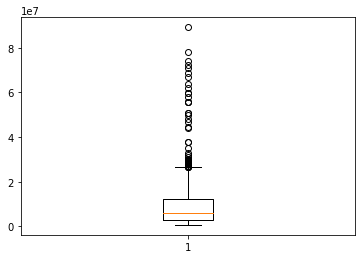

In [4]:
#check for outliers
plt.boxplot(education_df['TOTAL_REVENUE'])
plt.show()

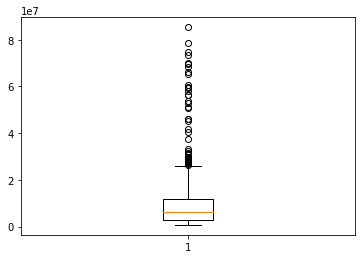

In [5]:
#check for outliers
plt.boxplot(education_df['TOTAL_EXPENDITURE'])
plt.show()

In [6]:
#check for outliers
z_scores = zscore(education_df['TOTAL_REVENUE'])
for threshold in range(1,5):
    print('The score threshold is: {}'.format(threshold))
    print('The indices of the outliers:')
    print(np.where(z_scores > threshold))
    print('Number of outliers is: {}'.format(len((np.where(z_scores > threshold)[0]))))

The score threshold is: 1
The indices of the outliers:
(array([  3,  27,  53,  62,  91, 102, 114, 142, 153, 165, 170, 191, 193,
       199, 204, 216, 222, 226, 244, 246, 252, 257, 269, 274, 278, 295,
       297, 303, 308, 322, 327, 331, 348, 350, 356, 361, 373, 378, 382,
       399, 401, 404, 407, 412, 420, 425, 430, 434, 451, 453, 458],
      dtype=int64),)
Number of outliers is: 51
The score threshold is: 2
The indices of the outliers:
(array([ 27,  62,  91, 114, 142, 165, 193, 204, 216, 246, 257, 269, 297,
       308, 322, 350, 361, 373, 401, 412, 425, 453, 458], dtype=int64),)
Number of outliers is: 23
The score threshold is: 3
The indices of the outliers:
(array([ 62, 114, 165, 216, 246, 269, 297, 322, 350, 373, 401, 412, 425,
       453, 458], dtype=int64),)
Number of outliers is: 15
The score threshold is: 4
The indices of the outliers:
(array([165, 216, 269, 322, 373, 425, 453], dtype=int64),)
Number of outliers is: 7


In [7]:
#check for outliers
z_scores = zscore(education_df['TOTAL_EXPENDITURE'])
for threshold in range(1,5):
    print('The score threshold is: {}'.format(threshold))
    print('The indices of the outliers:')
    print(np.where(z_scores > threshold))
    print('Number of outliers is: {}'.format(len((np.where(z_scores > threshold)[0]))))

The score threshold is: 1
The indices of the outliers:
(array([  3,  27,  53,  62,  91, 102, 114, 142, 153, 165, 170, 191, 193,
       199, 204, 216, 222, 226, 244, 246, 252, 257, 269, 274, 278, 295,
       297, 303, 308, 322, 327, 331, 348, 350, 356, 361, 373, 378, 382,
       399, 401, 407, 412, 420, 425, 430, 434, 451, 453, 458], dtype=int64),)
Number of outliers is: 50
The score threshold is: 2
The indices of the outliers:
(array([ 27,  62,  91, 114, 142, 153, 165, 193, 204, 216, 246, 257, 269,
       297, 308, 322, 350, 361, 373, 401, 412, 425, 453, 458], dtype=int64),)
Number of outliers is: 24
The score threshold is: 3
The indices of the outliers:
(array([ 62, 114, 165, 216, 246, 257, 269, 297, 308, 322, 350, 373, 401,
       412, 425, 453, 458], dtype=int64),)
Number of outliers is: 17
The score threshold is: 4
The indices of the outliers:
(array([114, 165, 216, 269, 322, 373, 425, 453], dtype=int64),)
Number of outliers is: 8


In [8]:
#check for outliers
q75, q25 = np.percentile(education_df['TOTAL_REVENUE'], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print('The score threshold is: {}'.format(threshold))
    print('Number of outliers is: {}'.format(
        len((np.where((education_df['TOTAL_REVENUE'] > max_val) 
                      | (education_df['TOTAL_REVENUE'] < min_val))[0]))
    ))

The score threshold is: 1.0
Number of outliers is: 61
The score threshold is: 1.5
Number of outliers is: 45
The score threshold is: 2.0
Number of outliers is: 28
The score threshold is: 2.5
Number of outliers is: 24
The score threshold is: 3.0
Number of outliers is: 22
The score threshold is: 3.5
Number of outliers is: 20
The score threshold is: 4.0
Number of outliers is: 17
The score threshold is: 4.5
Number of outliers is: 15


In [18]:
#remove revenue outliers and check
education_df['WINSORIZED_REVENUE'] = winsorize(education_df['TOTAL_REVENUE'], (0, 0.10))

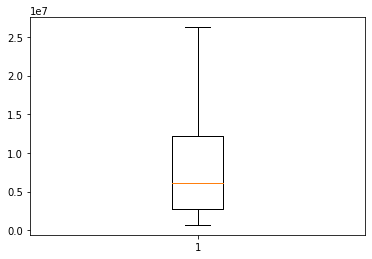

In [19]:
plt.boxplot(education_df['WINSORIZED_REVENUE'])
plt.show()

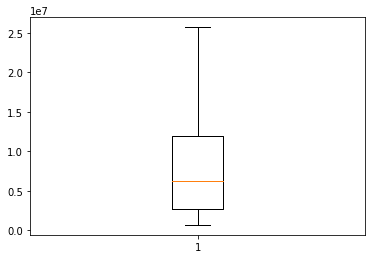

In [21]:
#remove expenditure outliers and check
education_df['WINSORIZED_EXPENDITURE'] = winsorize(education_df['TOTAL_EXPENDITURE'], (0, 0.10))
plt.boxplot(education_df['WINSORIZED_EXPENDITURE'])
plt.show()

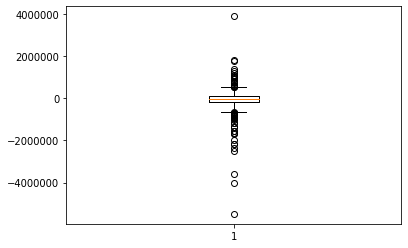

In [12]:
#define deficit and check for outliers
education_df['DEFICIT'] = education_df['TOTAL_REVENUE'] - education_df['TOTAL_EXPENDITURE']
plt.boxplot(education_df['DEFICIT'])
plt.show()

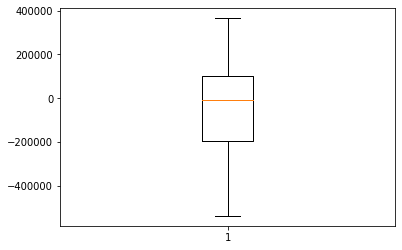

In [22]:
#remove outliers from deficit
education_df['winsorised_deficit'] = winsorize(education_df['DEFICIT'], (0.10, 0.10))
plt.boxplot(education_df['winsorised_deficit'] )
plt.show()

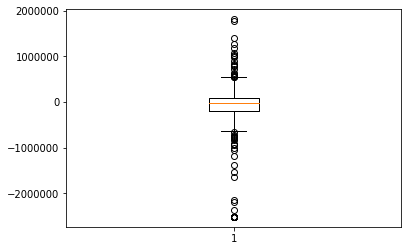

In [14]:
#define deficit using winsorized variables and check for outliers
education_df['REVISED_DEFICIT'] = education_df['WINSORIZED_REVENUE'] - education_df['WINSORIZED_EXPENDITURE']
plt.boxplot(education_df['REVISED_DEFICIT'])
plt.show()

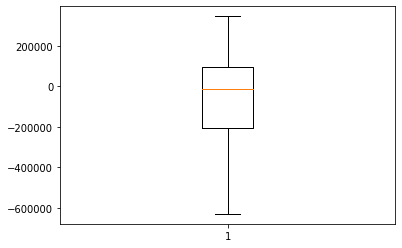

In [23]:
#remove outliers
education_df['REVISED_WINSORISED_DEFICIT'] = winsorize(education_df['REVISED_DEFICIT'], (0.10, 0.10))
plt.boxplot(education_df['REVISED_WINSORISED_DEFICIT'])
plt.show()

In [24]:
#get descriptive statistics for deficit variables
education_df[['winsorised_deficit', 'REVISED_WINSORISED_DEFICIT']].describe()

,winsorised_deficit,REVISED_WINSORISED_DEFICIT
count,466.000000,466.000000
mean,-46221.075107,-65786.019313
std,256023.510074,275351.713657
min,-538253.000000,-630307.000000
25%,-196574.750000,-204775.000000
50%,-8872.500000,-12823.500000
75%,101394.750000,98263.000000
max,365079.000000,347190.000000


The summary statistics for the two methods of calculating the deficit have some differences. The mean of the two variables varies by about 20,000, while the median differs by only about 4000.

If the variable of interest is the budget deficit, it makes more sense to calculate the deficit and then remove outliers, as completed in question 3. Taking the difference of the two variables might cancel two outliers out, so it is better to calculate the deficit after taking the difference.